In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset (reemplaza 'tu_dataset.csv' con el nombre de tu archivo CSV)
df = pd.read_csv('AIR_DEF.csv')
# df = pd.read_csv('air-overpressure_train.csv')


In [73]:
# Dividir el dataset en características (X) y la variable objetivo (y)
X = df.drop('Percentil_Rango', axis=1)
y = df['Percentil_Rango']

# X = df.drop('Air-overpressure probability (%)', axis=1)
# y = df['Air-overpressure probability (%)']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [74]:
# Escalar las características para algunos algoritmos (opcional, dependiendo del modelo)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# Inicializar modelos
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    # 'XGBoost': XGBClassifier(),
    # Agrega otros modelos según sea necesario
}

In [76]:
# Entrenar y evaluar los modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name}: Accuracy = {accuracy}')

Random Forest: Accuracy = 0.8867111111111111
Gradient Boosting: Accuracy = 0.9202222222222223
Support Vector Machine: Accuracy = 0.1484888888888889


c:\Users\alexm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors: Accuracy = 0.14755555555555555
Logistic Regression: Accuracy = 0.0924


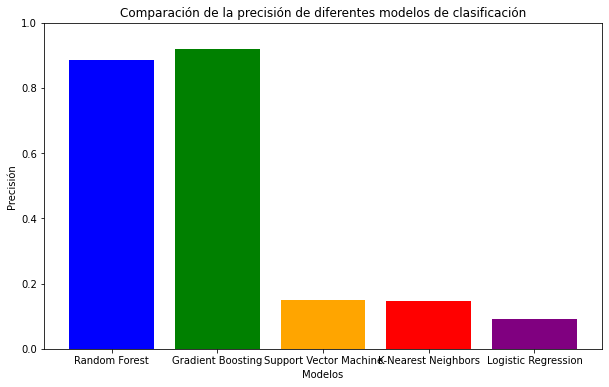

In [77]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Comparación de la precisión de diferentes modelos de clasificación')
plt.ylim(0, 1)  # Ajusta el rango del eje y si es necesario
plt.show()

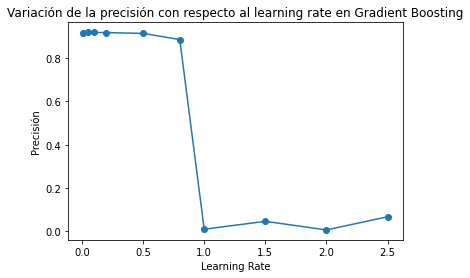

0.9204444444444444


In [80]:
# Define una lista de posibles valores para el hiperparámetro 'learning_rate'
learning_rate_values = [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1.0, 1.5, 2.0, 2.5]

# Inicializa listas para almacenar la precisión correspondiente a cada valor de 'learning_rate'
accuracy_list = []

# Itera sobre los valores de 'learning_rate', ajusta el modelo, calcula la precisión y almacena los resultados
for learning_rate_value in learning_rate_values:
    gb = GradientBoostingClassifier(learning_rate=learning_rate_value, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Grafica la precisión en función del valor de 'learning_rate'
plt.plot(learning_rate_values, accuracy_list, marker='o')
plt.title('Variación de la precisión con respecto al learning rate en Gradient Boosting')
plt.xlabel('Learning Rate')
plt.ylabel('Precisión')
plt.show()

print(max(accuracy_list))

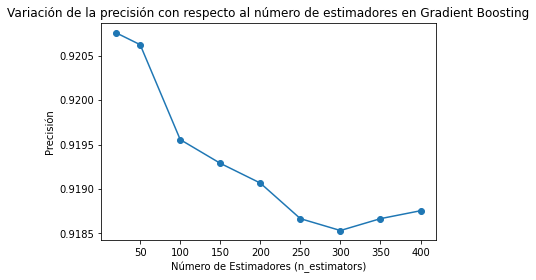

0.9207555555555555


In [81]:
# Define una lista de posibles valores para el hiperparámetro 'n_estimators'
n_estimators_values = [20, 50, 100, 150, 200, 250, 300, 350, 400]

# Inicializa listas para almacenar la precisión correspondiente a cada valor de 'n_estimators'
accuracy_list = []

# Itera sobre los valores de 'n_estimators', ajusta el modelo, calcula la precisión y almacena los resultados
for n_estimators_value in n_estimators_values:
    gb = GradientBoostingClassifier(n_estimators=n_estimators_value, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Grafica la precisión en función del valor de 'n_estimators'
plt.plot(n_estimators_values, accuracy_list, marker='o')
plt.title('Variación de la precisión con respecto al número de estimadores en Gradient Boosting')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Precisión')
plt.show()


print(max(accuracy_list))

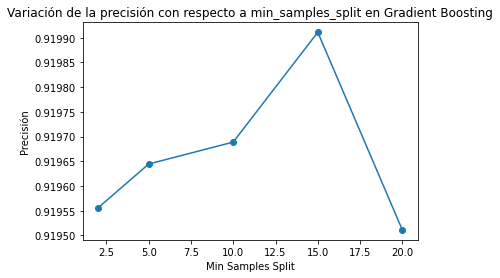

0.9199111111111111


In [97]:
# Define una lista de posibles valores para el hiperparámetro 'min_samples_split'
min_samples_split_values = [2, 5, 10, 15, 20]

# Inicializa listas para almacenar la precisión correspondiente a cada valor de 'min_samples_split'
accuracy_list = []

# Itera sobre los valores de 'min_samples_split', ajusta el modelo, calcula la precisión y almacena los resultados
for min_samples_split_value in min_samples_split_values:
    gb = GradientBoostingClassifier(min_samples_split=min_samples_split_value, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Grafica la precisión en función del valor de 'min_samples_split'
plt.plot(min_samples_split_values, accuracy_list, marker='o')
plt.title('Variación de la precisión con respecto a min_samples_split en Gradient Boosting')
plt.xlabel('Min Samples Split')
plt.ylabel('Precisión')
plt.show()

print(max(accuracy_list))

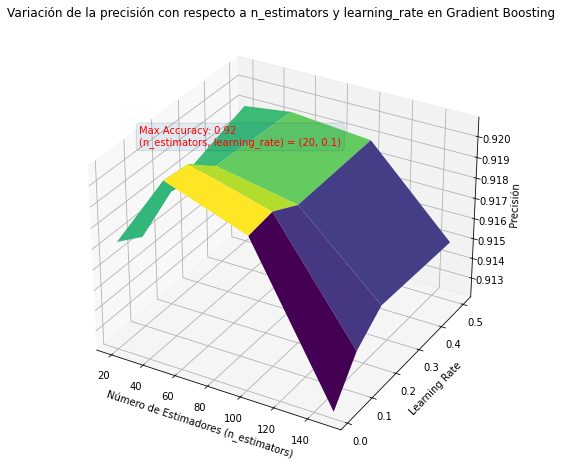

In [96]:
# Define listas de posibles valores para los hiperparámetros 'n_estimators' y 'learning_rate'
n_estimators_values = [20, 50, 100, 150]
learning_rate_values = [0.01, 0.1, 0.2, 0.5]

# Crea una cuadrícula de gráficas en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Inicializa una matriz para almacenar la precisión correspondiente a cada combinación de valores
accuracy_matrix = np.zeros((len(n_estimators_values), len(learning_rate_values)))

# Itera sobre los valores de 'n_estimators' y 'learning_rate', ajusta el modelo, calcula la precisión y almacena los resultados
for i, n_estimators_value in enumerate(n_estimators_values):
    for j, learning_rate_value in enumerate(learning_rate_values):
        gb = GradientBoostingClassifier(n_estimators=n_estimators_value, learning_rate=learning_rate_value, random_state=42)
        gb.fit(X_train, y_train)
        y_pred = gb.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_matrix[i, j] = accuracy

# Crea una cuadrícula de superficie 3D para visualizar la precisión en función de 'n_estimators' y 'learning_rate'
n_estimators_grid, learning_rate_grid = np.meshgrid(n_estimators_values, learning_rate_values)

surface = ax.plot_surface(n_estimators_grid, learning_rate_grid, accuracy_matrix, cmap='viridis')

# Encuentra las coordenadas (índices) del máximo en la matriz de precisión
max_index = np.unravel_index(np.argmax(accuracy_matrix, axis=None), accuracy_matrix.shape)

# Agrega texto con la precisión máxima y las coordenadas correspondientes
max_accuracy = accuracy_matrix[max_index]
ax.text(n_estimators_values[max_index[0]], learning_rate_values[max_index[1]], max_accuracy,
        f'Max Accuracy: {max_accuracy:.2f}\n(n_estimators, learning_rate) = ({n_estimators_values[max_index[0]]}, {learning_rate_values[max_index[1]]})',
        color='red', fontsize=10, bbox=dict(boxstyle="round", alpha=0.1), ha='left', va='bottom')

ax.set_title('Variación de la precisión con respecto a n_estimators y learning_rate en Gradient Boosting')
ax.set_xlabel('Número de Estimadores (n_estimators)')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Precisión')

plt.show()